# Model Identification

Now that we have determined the order of differencing (which is 1), now we must identify the **autoregressive order (AR) p** and the **moving average (MA) order q** for the ARIMA model.

- Autogressive order: indicates that the evolving variable of interest is determined by order p before. 
    - For example, in order to determine your future behaviour, you would look at your behaviour p days before to predict this.
- Moving average order: The order by which you use past predictions to correct future predictions. 
    - For example, if you predicted your mood to be 5 yesterday, but it was actually 6, your error would be +1. You carry this over to future predictions

## ACF and PACF

We can use the autocorrelation function and partial autocorrelation function to determine the orders p and q.

In [1]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

In [2]:
#Importing differenced data
btc_diff_data = pd.read_csv('data/btc_data_diff.csv')

In [3]:
#Drop every column except closing prices
btc_diff_data['Date'] = pd.to_datetime(btc_diff_data['Date'])
btc_diff_data.set_index('Date', inplace=True)
btc_diff_data = btc_diff_data.dropna().astype(float)
btc_diff_data = btc_diff_data['Close']

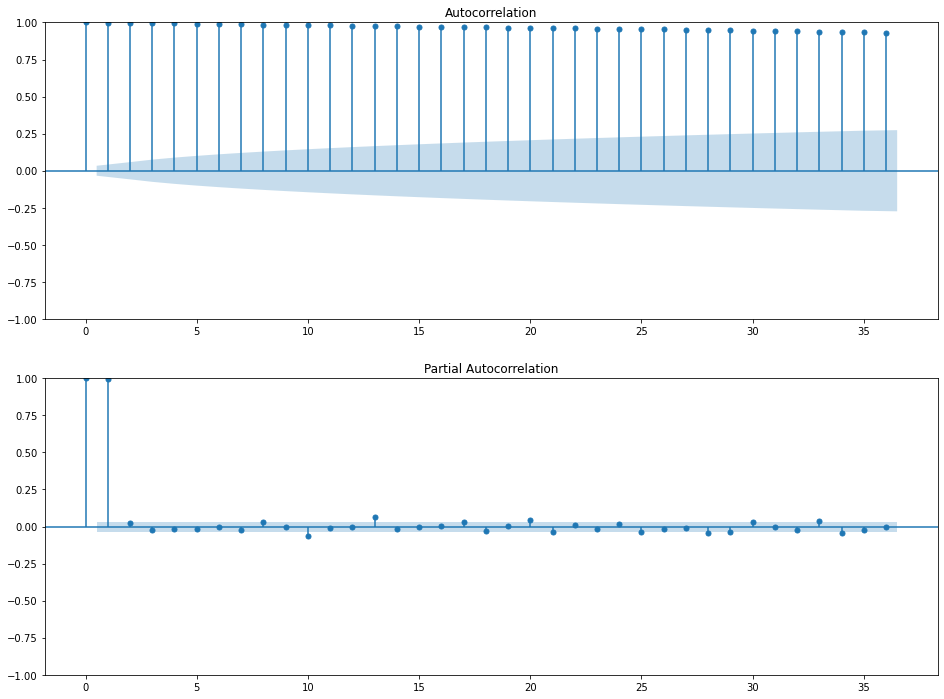

In [4]:
#Plots for ACF and PACF
fig, ax = plt.subplots(2, figsize=(16, 12))
plot_acf(btc_diff_data, ax=ax[0])
plot_pacf(btc_diff_data, ax=ax[1])
plt.show()

The ACF plot shows a gradual drop around 1, suggesting that the time series is more autoregressive in nature. The PACF plot shows a sharp spike and drop, indicative of an autoregressive process. Given this we consider the parameters to be:
- AR(p): **1**, this is because of the significant spike lag in the PACF plot
- MA(q): **0 then test with 1**, this is because the ACF plot doesn't show a strong average moving component, so initially test with 0 then 1.
- Differencing(d): As shown in data analysis, the differencing order is **1**.

Now that we have the relevant parameters, we can input these into the ARIMA model

In [5]:
btc_data = pd.read_csv('data/btc_data.csv')

In [6]:
import pmdarima as pm

In [7]:

btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data.set_index('Date', inplace=True)
btc_data = btc_data.dropna().astype(float)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3412
Model:               SARIMAX(3, 1, 2)   Log Likelihood              -27568.196
Date:                Thu, 20 Jun 2024   AIC                          55150.391
Time:                        16:34:41   BIC                          55193.334
Sample:                             0   HQIC                         55165.737
                               - 3412                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.8243     15.351      0.705      0.481     -19.263      40.912
ar.L1          0.8160      0.012     67.954      0.000       0.793       0.840
ar.L2         -0.9492      0.010    -94.972      0.0

/Users/yash/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yash/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


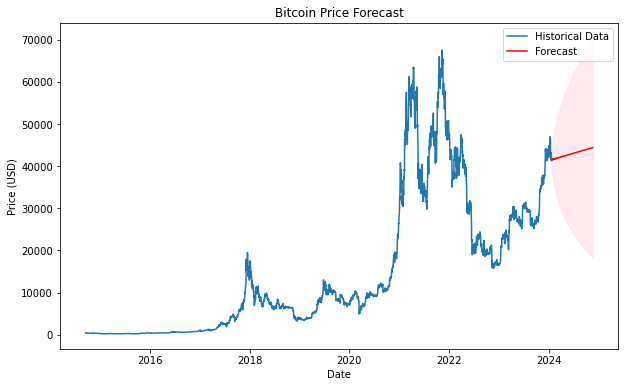

In [11]:
# Use pmdarima to find the best ARIMA model
model = pm.auto_arima(btc_data['Close'], seasonal=False, stepwise=True, suppress_warnings=True)

# Print model summary
print(model.summary())

# Forecast the next 30 days
forecast, conf_int = model.predict(n_periods=300, return_conf_int=True)

# Plot the historical data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(btc_data['Close'], label='Historical Data')
plt.plot(pd.date_range(start=btc_data.index[-1], periods=300, freq='D'), forecast, label='Forecast', color='red')
plt.fill_between(pd.date_range(start=btc_data.index[-1], periods=300, freq='D'), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

Since we suspect seasonality in our data, we can also do the following

In [9]:
# Fit a seasonal ARIMA model
model = pm.auto_arima(btc_data['Close'], seasonal=True, m=12, stepwise=True, suppress_warnings=True)  # m=12 for yearly seasonality

# Print model summary
print(model.summary())

# Forecast the next 30 days
forecast, conf_int = model.predict(n_periods=30, return_conf_int=True)

# Plot the historical data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(btc_data['Close'], label='Historical Data')
plt.plot(pd.date_range(start=btc_data.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.fill_between(pd.date_range(start=btc_data.index[-1], periods=30, freq='D'), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


KeyboardInterrupt: 